In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression



In [2]:
def get_data(n_train_samples=10000):
    # Retrieve MNIST dataset from Tensorflow Keras datasets
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Select 10000 random samples from x_train
    np.random.seed(1)
    indices = list(range(x_train.shape[0]))
    np.random.shuffle(indices)
    train_idx = indices[:n_train_samples]
    x_train = x_train[train_idx].reshape(n_train_samples, -1)
    y_train = y_train[train_idx]
    x_test = x_test.reshape(x_test.shape[0], -1)
    
    # Normalize data
    x_train.astype(np.float32)
    x_test.astype(np.float32)
    x_train = np.multiply(x_train, 1.0/255)
    x_test = np.multiply(x_test, 1.0/255)
    
    return x_train, y_train, x_test, y_test

In [3]:
def generate_synthetic_data(x, r1, r2):
    # Perform the operation to generate synthetic data
    o = np.dot(x, r1) ** 2 + np.dot(x, r2) ** 2  # real and complex part
    return o

In [4]:
def fit_ridge_classifier(x_train, y_train, x_test, y_test, alpha=0.001):
    # Fit a Ridge Classifier
    clf = RidgeClassifier(alpha=alpha)
    clf.fit(x_train, y_train.ravel())
    
    # Evaluate prediction accuracy on training and test data
    train_accuracy = clf.score(x_train, y_train)
    test_accuracy = clf.score(x_test, y_test)
    return train_accuracy, test_accuracy

In [5]:
# Get Data

x_train, y_train, x_test, y_test = get_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Run experiments

train_acc_list = []
test_acc_list = []

feature_size_list = sorted([1000 * k for k in range(1, 16)] + [250, 500, 1500, 2500, 9500, 10500, 17500, 20000, 22500, 25000, 27500, 30000])
for num_feature in feature_size_list:
    dim = 28 * 28
    R1 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    R2 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    x_train_synthetic = generate_synthetic_data(x_train, R1, R2)
    x_test_synthetic = generate_synthetic_data(x_test, R1, R2)
    
    train_accuracy, test_accuracy = fit_ridge_classifier(x_train_synthetic, y_train, x_test_synthetic, y_test)
    train_acc_list.append(train_accuracy)
    test_acc_list.append(test_accuracy)
    print ("Number of features: %d. Training accuracy: %.3f. Test accuracy: %.3f" % (num_feature, train_accuracy, test_accuracy))

Number of features: 250. Training accuracy: 0.894. Test accuracy: 0.883
Number of features: 500. Training accuracy: 0.935. Test accuracy: 0.917
Number of features: 1000. Training accuracy: 0.966. Test accuracy: 0.937
Number of features: 1500. Training accuracy: 0.978. Test accuracy: 0.948
Number of features: 2000. Training accuracy: 0.986. Test accuracy: 0.950
Number of features: 2500. Training accuracy: 0.992. Test accuracy: 0.949
Number of features: 3000. Training accuracy: 0.995. Test accuracy: 0.950
Number of features: 4000. Training accuracy: 0.998. Test accuracy: 0.942
Number of features: 5000. Training accuracy: 1.000. Test accuracy: 0.934
Number of features: 6000. Training accuracy: 1.000. Test accuracy: 0.923
Number of features: 7000. Training accuracy: 1.000. Test accuracy: 0.898
Number of features: 8000. Training accuracy: 1.000. Test accuracy: 0.868
Number of features: 9000. Training accuracy: 1.000. Test accuracy: 0.848
Number of features: 9500. Training accuracy: 1.000. T

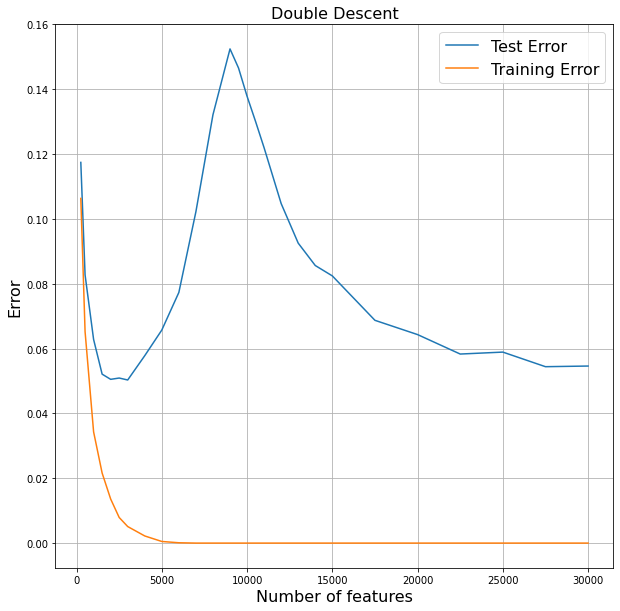

In [ ]:
# Plot Train and Test Error

plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(test_acc_list), label = "Test Error")
plt.plot(feature_size_list, 1-np.array(train_acc_list), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()

In [5]:

def fit_Linear_classifier(x_train, y_train, x_test, y_test):
    # Fit a Decision tree classifier

    clf = LinearRegression()
    clf.fit(x_train, y_train.ravel())
    
    # Evaluate prediction accuracy on training and test data
    train_accuracy = clf.score(x_train, y_train)
    test_accuracy = clf.score(x_test, y_test)
    return train_accuracy, test_accuracy

In [6]:
# Run experiments with Lasso

train_acc_list2 = []
test_acc_list2 = []

feature_size_list = [250,500, 1000, 2000, 6000, 8000, 12000, 14000, 20000, 25000]
for num_feature in feature_size_list:
    dim = 28 * 28
    R1 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    R2 = np.random.randn(dim, num_feature) / np.sqrt(num_feature)
    x_train_synthetic = generate_synthetic_data(x_train, R1, R2)
    x_test_synthetic = generate_synthetic_data(x_test, R1, R2)
    
    train_accuracy, test_accuracy = fit_Linear_classifier(x_train_synthetic, y_train, x_test_synthetic, y_test)
    train_acc_list2.append(train_accuracy)
    test_acc_list2.append(test_accuracy)
    print ("Number of features: %d. Training accuracy: %.3f. Test accuracy: %.3f" % (num_feature, train_accuracy, test_accuracy))

Number of features: 250. Training accuracy: 0.629. Test accuracy: 0.623
Number of features: 500. Training accuracy: 0.711. Test accuracy: 0.691
Number of features: 1000. Training accuracy: 0.788. Test accuracy: 0.735
Number of features: 2000. Training accuracy: 0.853. Test accuracy: 0.756
Number of features: 6000. Training accuracy: 0.954. Test accuracy: 0.579
Number of features: 8000. Training accuracy: 0.983. Test accuracy: 0.063
Number of features: 12000. Training accuracy: 1.000. Test accuracy: 0.002
Number of features: 14000. Training accuracy: 1.000. Test accuracy: 0.366
Number of features: 20000. Training accuracy: 1.000. Test accuracy: 0.599
Number of features: 25000. Training accuracy: 1.000. Test accuracy: 0.657


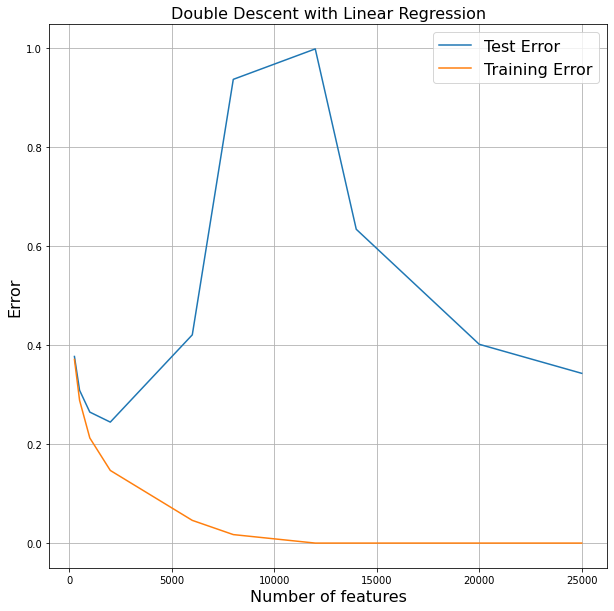

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(test_acc_list2), label = "Test Error")
plt.plot(feature_size_list, 1-np.array(train_acc_list2), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent with Linear Regression', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()

In [6]:
#generation features using fourier series
def generate_fourier_data(X, num_features):
    # Perform the operation to generate synthetic data
    N, D = X.shape
    W = np.random.normal(loc=0, scale=1, size=(num_features, D))
    b = np.random.uniform(0, 2*np.pi, size=num_features)
    B = np.repeat(b[:, np.newaxis], N, axis=1)
    norm = 1./ np.sqrt(num_features)
    Z = norm * np.sqrt(2) * np.cos(W @ X.T + B)
    return Z.T


In [7]:
# Run experiments using fourier series feature generation

train_acc_list3 = []
test_acc_list3 = []

#feature_size_list = sorted([1000 * k for k in range(1, 16)] + [250, 500, 1500, 2500, 9500, 10500, 17500, 20000, 22500, 25000, 27500, 30000])
feature_size_list = [250, 500, 1000, 2000, 4000, 6000, 8000, 12000]
for num_feature in feature_size_list:
    dim = 28 * 28
    x_train_synthetic = generate_fourier_data(x_train, num_features = num_feature)
    x_test_synthetic = generate_fourier_data(x_test, num_features = num_feature)
    
    train_accuracy, test_accuracy = fit_ridge_classifier(x_train_synthetic, y_train, x_test_synthetic, y_test, alpha=1)
    train_acc_list3.append(train_accuracy)
    test_acc_list3.append(test_accuracy)
    print ("Number of features: %d. Training accuracy: %.3f. Test accuracy: %.3f" % (num_feature, train_accuracy, test_accuracy))

Number of features: 250. Training accuracy: 0.209. Test accuracy: 0.102
Number of features: 500. Training accuracy: 0.271. Test accuracy: 0.103
Number of features: 1000. Training accuracy: 0.373. Test accuracy: 0.100
Number of features: 2000. Training accuracy: 0.539. Test accuracy: 0.101
Number of features: 4000. Training accuracy: 0.813. Test accuracy: 0.102
Number of features: 6000. Training accuracy: 0.947. Test accuracy: 0.100
Number of features: 8000. Training accuracy: 0.985. Test accuracy: 0.100
Number of features: 12000. Training accuracy: 1.000. Test accuracy: 0.107


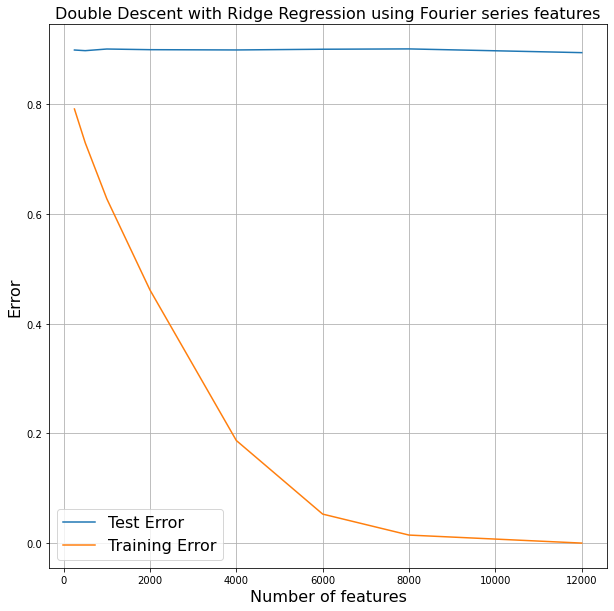

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(feature_size_list, 1-np.array(test_acc_list3), label = "Test Error")
plt.plot(feature_size_list, 1-np.array(train_acc_list3), label = "Training Error")
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.title('Double Descent with Ridge Regression using Fourier series features', fontsize=16)
plt.grid()
plt.legend(fontsize='16')
plt.show()

**Observation for 3A**
I have tried Lasso and decision tree before trying Linear.
Surprisingly, as the features increased the training accuracy also went down and then started growing. This is not what i expected.
Also for Lasso regression, I had to increase the number of iterations to be around 2000. (From the default 1000) as the model was not converging.
When i ran Linear regerssion using feature generator or random number mixes, the test accuracy went up till 2000 features and it started coming down.
Due to the RAM limitation, i didnt run alot of data points but test accuracy around 10,000 reached negative.(Need to understand how accuracy is calculated.
After 10,000 features, the test accuracy started increasing.

**Observations for 3B**

The model overfits the data and the test accuracy remains very low around 10%
I tried various alpha values to increase regularization but the impact of ridge regression was minimal.
I have even tried Linear regression but the processing was taking alot of time and overloading RAM to run for features >5000
There was no impact of sigma as well, while generating fourier features

